In [1]:
import pandas as pd 
import numpy as np  
from utils import clean_nba_data
from vus import generate_binned_df, get_vus, plot_vus, bootstrap_vus, plot_auc_surface_with_confidence, bootstrap_vus_parallel

raw_data = pd.read_csv("nba_2018.csv")
raw_data.head()

df = clean_nba_data(raw_data)

binned_df, bin_width_map = generate_binned_df(df)

In [2]:
vus, _ = get_vus(binned_df, bin_width_map)
print(vus)

0.8233984155825648


Generating 3D plot...
Adding reference plane for random chance (TPR = FPR)...
Plot generated. Displaying now.


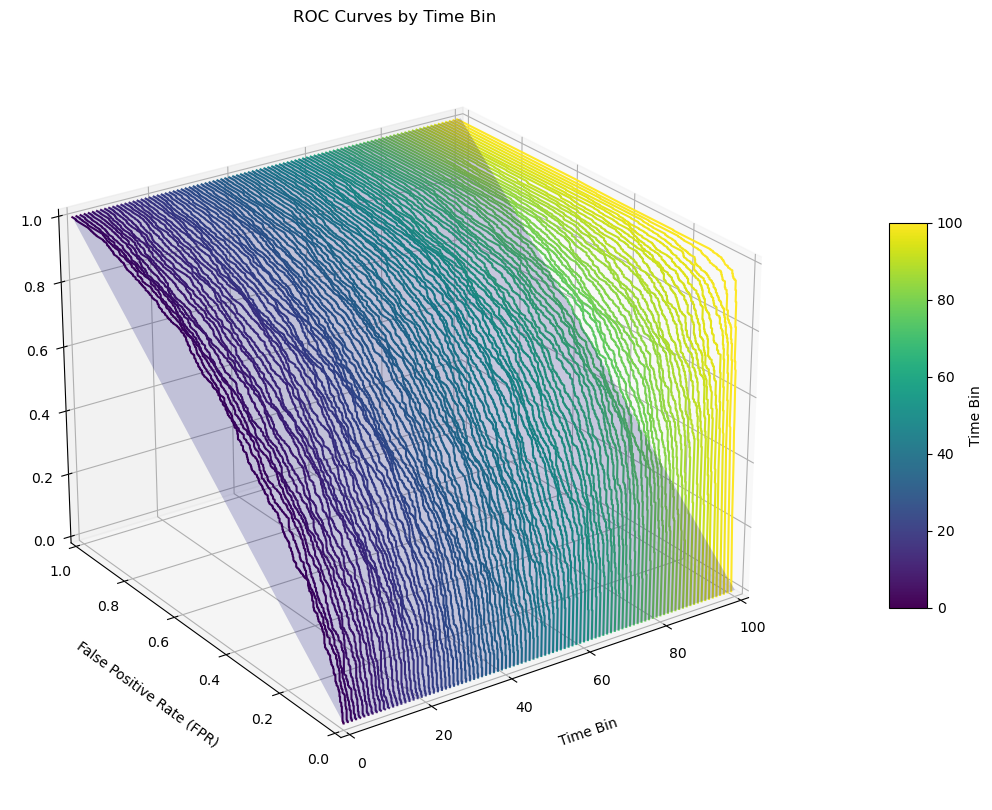

In [3]:
plot_vus(binned_df, bin_width_map)

In [4]:
vus_distribution, lower_bound, upper_bound, auc_df = bootstrap_vus_parallel(df)

Starting parallel bootstrapping with 1000 samples...


Bootstrapping: 100%|███████████████████████████████████████████████████████████| 1000/1000 [12:28<00:00,  1.34it/s]


In [5]:
lower_bound

0.8108374860939073

In [6]:
upper_bound

0.8364002023338509

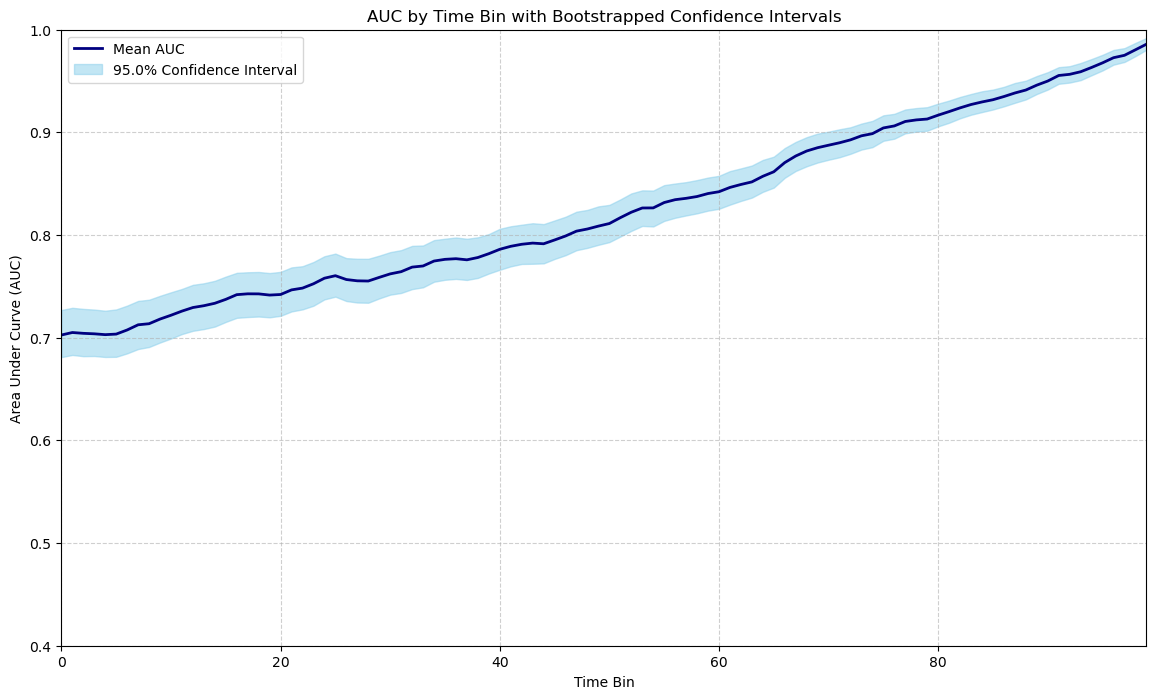

In [7]:
plot_auc_surface_with_confidence(auc_df)

In [5]:
from benchmarks import fit_dynamic_benchmark, prepare_benchmark_data

In [6]:
merged_df = prepare_benchmark_data(year='2018')

In [7]:
num_bins = 100

### Coin-Flip (CF) Model

In [8]:
cf_df = merged_df.copy()
cf_df['home_WP'] = 0.5
binned_cf_df, cf_bin_map = generate_binned_df(cf_df, num_bins=num_bins)
vus_cf, _ = get_vus(binned_cf_df, cf_bin_map, num_bins=len(cf_bin_map))

In [9]:
vus_cf

0.5

Generating 3D plot...
Adding reference plane for random chance (TPR = FPR)...
Plot generated. Displaying now.


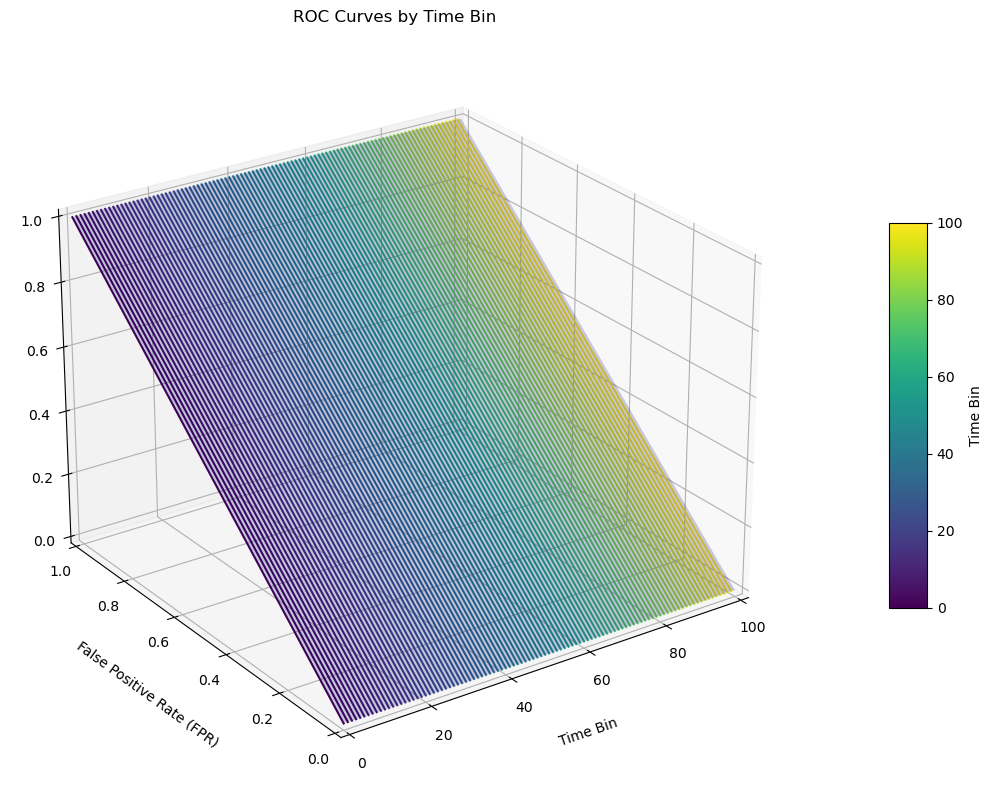

In [10]:
plot_vus(binned_cf_df, cf_bin_map)

### Historic Home Win (HomeWP) Model

In [11]:
homewp_df = merged_df.copy()
homewp_df['home_WP'] = 0.593
binned_homewp_df, homewp_bin_map = generate_binned_df(homewp_df, num_bins=num_bins)
vus_homewp, _ = get_vus(binned_homewp_df, homewp_bin_map, num_bins=len(homewp_bin_map))
print(f"Historic Home Win (HomeWP) VUS: {vus_homewp:.4f}")

Historic Home Win (HomeWP) VUS: 0.5000


Generating 3D plot...
Adding reference plane for random chance (TPR = FPR)...
Plot generated. Displaying now.


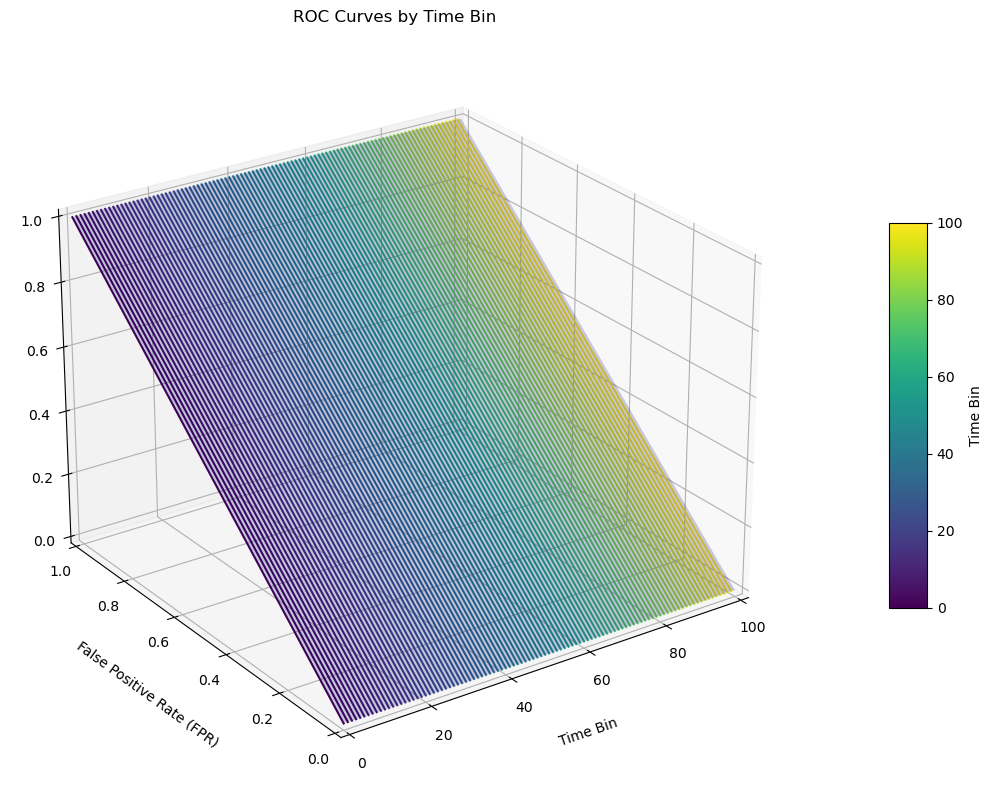

In [12]:
plot_vus(binned_homewp_df, homewp_bin_map)

### Pre-game Relative Strength (PgRS) Model

In [13]:
pgrs_df = merged_df.copy()
pgrs_df['home_WP'] = pgrs_df['elo_prob1']
binned_pgrs_df, pgrs_bin_map = generate_binned_df(pgrs_df, num_bins=num_bins)
binned_pgrs_df.dropna(subset=['avg_home_WP'], inplace=True)
vus_pgrs, _ = get_vus(binned_pgrs_df, pgrs_bin_map, num_bins=len(pgrs_bin_map))
print(f"Pre-game Relative Strength (PgRS) VUS: {vus_pgrs:.4f}")

Pre-game Relative Strength (PgRS) VUS: 0.6929


Generating 3D plot...
Adding reference plane for random chance (TPR = FPR)...
Plot generated. Displaying now.


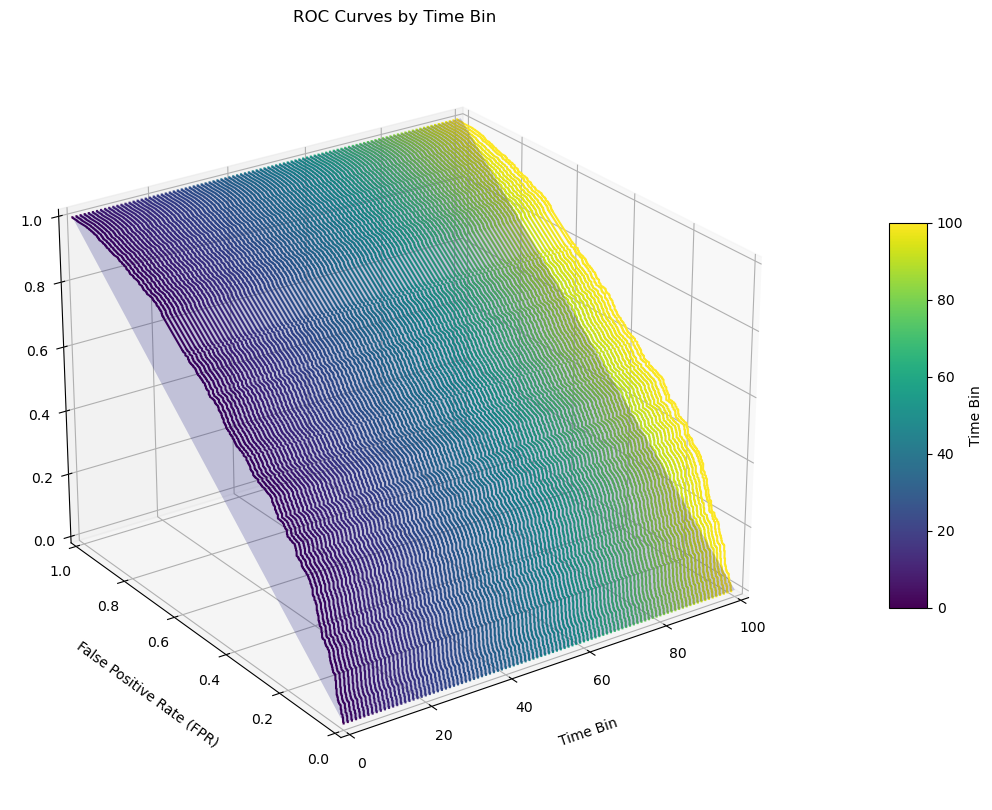

In [14]:
plot_vus(binned_pgrs_df, pgrs_bin_map)

### Score Difference (ScD) Model

In [15]:
scd_model_df = fit_dynamic_benchmark(merged_df, model_features=['score_diff'])
binned_scd_df, scd_bin_map = generate_binned_df(scd_model_df, num_bins=num_bins)
binned_scd_df.dropna(subset=['avg_home_WP'], inplace=True)
vus_scd, _ = get_vus(binned_scd_df, scd_bin_map, num_bins=len(scd_bin_map))
print(f"Score Difference (ScD) VUS: {vus_scd:.4f}")

Fitting model with features: ['score_diff'] across 100 time bins...
Score Difference (ScD) VUS: 0.7844


Generating 3D plot...
Adding reference plane for random chance (TPR = FPR)...
Plot generated. Displaying now.


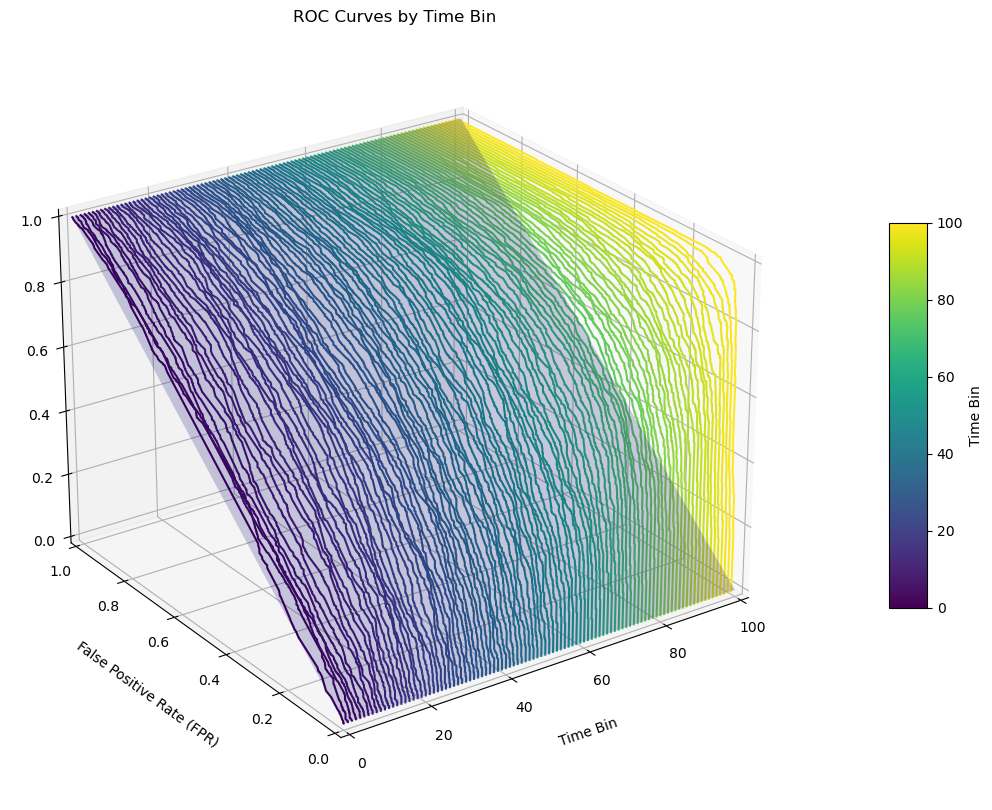

In [16]:
plot_vus(binned_scd_df, scd_bin_map)

### Pregame RS + Score Difference (PgRSScD) Model

In [17]:
pgrsscd_model_df = fit_dynamic_benchmark(merged_df, model_features=['elo_prob1', 'score_diff'])
binned_pgrsscd_df, pgrsscd_bin_map = generate_binned_df(pgrsscd_model_df, num_bins=num_bins)
binned_pgrsscd_df.dropna(subset=['avg_home_WP'], inplace=True)
vus_pgrsscd, _ = get_vus(binned_pgrsscd_df, pgrsscd_bin_map, num_bins=len(pgrsscd_bin_map))
print(f"Pregame RS + Score Difference (PgRSScD) VUS: {vus_pgrsscd:.4f}")

Fitting model with features: ['elo_prob1', 'score_diff'] across 100 time bins...
Pregame RS + Score Difference (PgRSScD) VUS: 0.8252


Generating 3D plot...
Adding reference plane for random chance (TPR = FPR)...
Plot generated. Displaying now.


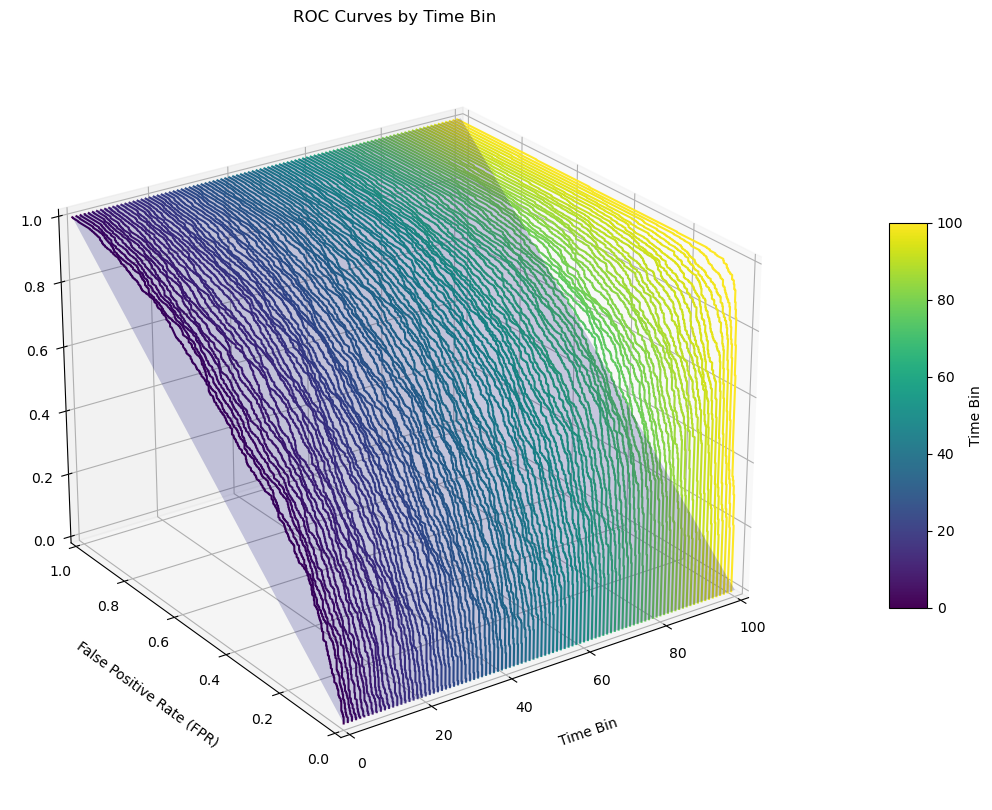

In [18]:
plot_vus(binned_pgrsscd_df, pgrsscd_bin_map)